# Lets start our regression problem for predicting the car price

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
tf.__version__

'2.18.0'

* reading the dataset

In [2]:
Car_price = pd.read_csv(r"Datasets\CarPrice_Assignment.csv")
Car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
Car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Since Carname has morethan 50 no of categories we dropping that column and we don't require car_ID column we can drop

In [4]:
Car_price = Car_price.drop(columns=['car_ID', 'CarName'], axis=1)
Car_price.shape

(205, 24)

In [5]:
columns_to_be_encoded ={}
for column in Car_price.columns:
    if Car_price[column].dtype == 'object':
        columns_to_be_encoded[column] = Car_price[column].unique()
columns_to_be_encoded

{'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'doornumber': array(['two', 'four'], dtype=object),
 'carbody': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object),
 'enginelocation': array(['front', 'rear'], dtype=object),
 'enginetype': array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object),
 'cylindernumber': array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
       dtype=object),
 'fuelsystem': array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
       dtype=object)}

In [6]:
one_hot_columns = []
label_encode_columns = []
for column, unique_values in columns_to_be_encoded.items():
    if len(unique_values) < 4:
        one_hot_columns.append(column)
    else:
        label_encode_columns.append(column)
one_hot_columns, label_encode_columns

(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation'],
 ['carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])

In [7]:
for column in Car_price.columns:
    if Car_price[column].dtype != 'object':
        print(f"{column}: {Car_price[column].mean()}")
        print(f"{column}: {Car_price[column].median()}")

symboling: 0.8341463414634146
symboling: 1.0
wheelbase: 98.75658536585367
wheelbase: 97.0
carlength: 174.04926829268288
carlength: 173.2
carwidth: 65.90780487804878
carwidth: 65.5
carheight: 53.72487804878049
carheight: 54.1
curbweight: 2555.5658536585365
curbweight: 2414.0
enginesize: 126.90731707317073
enginesize: 120.0
boreratio: 3.329756097560975
boreratio: 3.31
stroke: 3.255414634146341
stroke: 3.29
compressionratio: 10.142536585365855
compressionratio: 9.0
horsepower: 104.1170731707317
horsepower: 95.0
peakrpm: 5125.121951219512
peakrpm: 5200.0
citympg: 25.21951219512195
citympg: 24.0
highwaympg: 30.75121951219512
highwaympg: 30.0
price: 13276.710570731706
price: 10295.0


In [8]:
columns_to_be_scaled = []
for column in Car_price.columns:
    if Car_price[column].dtype != 'object' and column != 'symboling' and column != 'price':
        columns_to_be_scaled.append(column)
columns_to_be_scaled

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [9]:
from sklearn.preprocessing import LabelEncoder
Car_price_encoded = Car_price
le = LabelEncoder()
for column in label_encode_columns:
    Car_price_encoded[column] = le.fit_transform(Car_price_encoded[column])
    print(f"{column}: {Car_price_encoded[column].unique()}")
Car_price_encoded.head()

carbody: [0 2 3 4 1]
enginetype: [0 5 3 2 6 4 1]
cylindernumber: [2 3 1 4 5 6 0]
fuelsystem: [5 1 4 0 7 2 3 6]


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,2,rwd,front,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,3,fwd,front,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,3,4wd,front,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
X, y = Car_price_encoded.drop(columns=['price'], axis=1), Car_price['price']
X.shape, y.shape

((205, 23), (205,))

In [11]:
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
ct_ohe = make_column_transformer(
    (MinMaxScaler(), columns_to_be_scaled),
    (OneHotEncoder(handle_unknown="ignore", drop= None), one_hot_columns),
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct_ohe.fit(X_train)
X_train_min_scaled = ct_ohe.transform(X_train)
X_test_min_scaled = ct_ohe.transform(X_test)
X_train.shape, X_train_min_scaled.shape, X_test_min_scaled.shape, y_train.shape, y_test.shape

((164, 23), (164, 29), (41, 29), (164,), (41,))

## Building neural network model
* 1. Build a regressor model using sequential since we are creating linear relation using activation as None or Linear is fine
* 2. Compile the model with optimizer = SGD or Adam, loss = mae, metrics = mae
* 3. Fit the model with the training data with epochs of 100

In [17]:
X_train_min_scaled[0].shape

(29,)

In [23]:
tf.random.set_seed(42)

## 1. Build a model
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model1.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model1_history = model1.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13283.2129 - mae: 13283.2129 
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13282.6113 - mae: 13282.6113
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13282.0117 - mae: 13282.0117 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13281.4072 - mae: 13281.4072 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13280.7979 - mae: 13280.7979
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13280.1797 - mae: 13280.1797
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13279.5479 - mae: 13279.5479
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13278.8994 - mae: 13278.8994 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13278.2324 - mae: 13278.2324 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13277.5410 - mae: 13277.5410 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13276.8242 - mae: 13276.8242 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 

<Axes: >

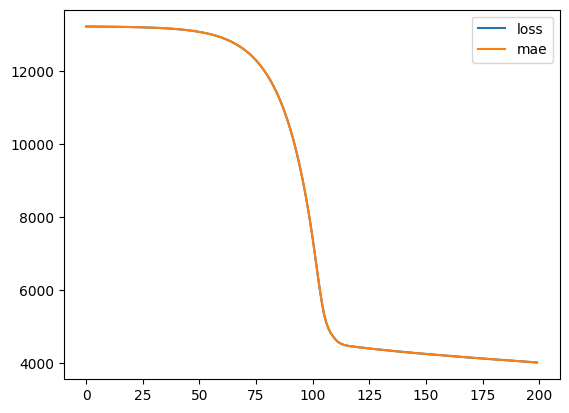

In [24]:
pd.DataFrame(model1_history.history).plot()

### Lets try with learning rate 0.01

In [26]:
tf.random.set_seed(42)

## 1. Build a model
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model2_history = model2.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 13282.1484 - mae: 13282.1484 
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13276.7861 - mae: 13276.7861 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13268.4365 - mae: 13268.4365 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13252.6240 - mae: 13252.6240
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13220.9277 - mae: 13220.9277
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13156.4746 - mae: 13156.4746
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13024.9287 - mae: 13024.9287
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12756.1846 - mae: 12756.1846
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12206.9814 - mae: 12206.9814
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11084.4990 - mae: 11084.4990
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8790.2119 - mae: 8790.2119 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9

<Axes: >

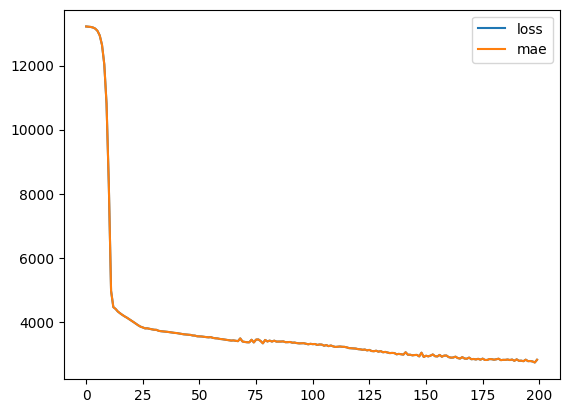

In [27]:
pd.DataFrame(model2_history.history).plot()

### lets try with Adam optimizer

In [32]:
tf.random.set_seed(42)

## 1. Build a model
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model3_history = model3.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 13281.4180 - mae: 13281.4180
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13274.2158 - mae: 13274.2158 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13265.9854 - mae: 13265.9854
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13256.0371 - mae: 13256.0371
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13243.8369 - mae: 13243.8369 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13228.9932 - mae: 13228.9932 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13211.1475 - mae: 13211.1475 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13189.9932 - mae: 13189.9932 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13165.2812 - mae: 13165.2812 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13136.8145 - mae: 13136.8145 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13104.4277 - mae: 13104.4277
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s

<Axes: >

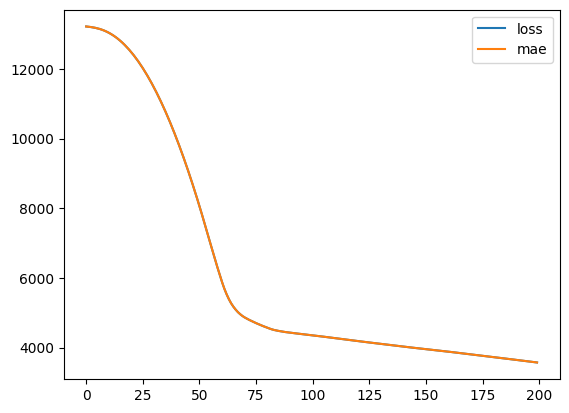

In [33]:
pd.DataFrame(model3_history.history).plot()

### Since our model is performing well with SGD optimizer it is best to go with lets train for 300 epochs

In [41]:
tf.random.set_seed(42)

## 1. Build a model
model4 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model4.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model4_history = model4.fit(X_train_min_scaled, y_train, epochs = 300)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 13279.9717 - mae: 13279.9717 
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13273.7842 - mae: 13273.7842
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13262.9775 - mae: 13262.9775
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13241.7920 - mae: 13241.7920 
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13198.9531 - mae: 13198.9531 
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13111.6543 - mae: 13111.6543 
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12933.3896 - mae: 12933.3896
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12569.1562 - mae: 12569.1562
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11824.7871 - mae: 11824.7871 
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10303.4131 - mae: 10303.4131 
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7251.5293 - mae: 7251.5293 
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8

<Axes: >

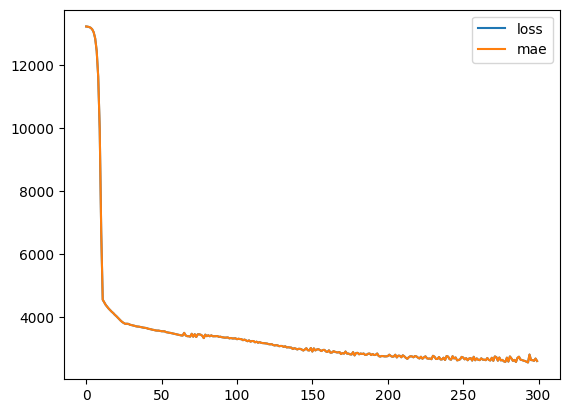

In [42]:
pd.DataFrame(model4_history.history).plot()

In [43]:
model4.evaluate(X_test_min_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3776.1045 - mae: 3776.1045 


[3691.7099609375, 3691.7099609375]

In [44]:
y_pred = model4.predict(X_test_min_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 


In [45]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.4724022501424767

In [46]:
Car_price_encoded.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,2,rwd,front,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,3,fwd,front,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,3,4wd,front,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [47]:
X, y = Car_price_encoded.drop(columns=['price'], axis=1), np.log1p(Car_price['price'].values)
X.shape, y.shape

((205, 23), (205,))

In [48]:
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
ct_ohe = make_column_transformer(
    (MinMaxScaler(), columns_to_be_scaled),
    (OneHotEncoder(handle_unknown="ignore", drop= None), one_hot_columns),
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct_ohe.fit(X_train)
X_train_min_scaled = ct_ohe.transform(X_train)
X_test_min_scaled = ct_ohe.transform(X_test)
X_train.shape, X_train_min_scaled.shape, X_test_min_scaled.shape, y_train.shape, y_test.shape

((164, 23), (164, 29), (41, 29), (164,), (41,))

In [49]:
tf.random.set_seed(42)

## 1. Build a model
log_model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
log_model1.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
log_model1_history = log_model1.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.6239 - mae: 9.6239   
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.5140 - mae: 5.5140
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8976 - mae: 1.8976
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5492 - mae: 1.5492
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3550 - mae: 1.3550
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2960 - mae: 1.2960
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2553 - mae: 1.2553
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1961 - mae: 1.1961
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1492 - mae: 1.1492
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0995 - mae: 1.0995
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0857 - mae: 1.0857 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0664 - mae: 1.0664 
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

<Axes: >

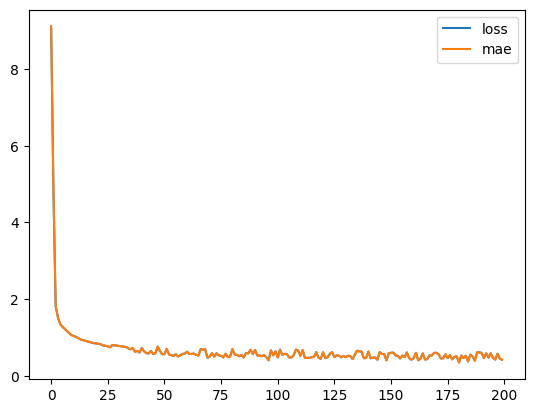

In [50]:
pd.DataFrame(log_model1_history.history).plot()

In [51]:
y_pred = log_model1.predict(X_test_min_scaled)
r2_score(y_pred, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


0.6555274463129364